# Statistical Analysis on factors influencing Life Expectancy - Data Cleaning and Data Preprocessing
---

The data-set we are going to use is related to life expectancy and other health factors for 193 countries and has been collected from the WHO data repository website. Its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative. It has been observed that in the past 15 years, there has been a huge development in health sector resulting in improvement of human mortality rates especially in the developing nations in comparison to the past 30 years.

The dataset can be downloaded from: https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who

It needs cleaning and preprocessing.

We will do the following steps:
- Sanity check of data
- Exploratory data analysis (EDA)
- Missing value treatments
- Outliers treatments
- Duplicate and garbage value treatments
- Normalization
- Adding a continent column
- Encoding of data
---


#### 1. Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### 2. Read the dataset

In [2]:
df=pd.read_csv(r"C:\Users\Administrator\Documents\Projects\life_expectancy_data.csv")

In [3]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
df.tail()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.0,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.0,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.0,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.0,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,...,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8


#### 3. Sanity check of the dataset
(Number of rows and columns, Uniqueness, Missing/invalid values, Duplicates, Data size, Basics statistics, Data distribution,...)

In [5]:
df.shape

(2938, 22)

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

Strip whitespaces from column names

In [7]:
df = df.rename(columns=lambda x: x.strip())

Changing column names to Snake Case model

In [8]:
df = df.rename({'Country':'country', 'Year': 'year', 'Status': 'status', 'Life expectancy': 'life_expectancy', 'Adult Mortality': 'adult_mortality', 'infant deaths': 'infant_deaths', 'Alcohol': 'alcohol', 'percentage expenditure': 'percentage_expenditure', 'Hepatitis B': 'hepatitis_B', 'Measles': 'measles', 'BMI': 'bmi', 'under-five deaths': 'under_five_deaths', 'Polio': 'polio', 'Total expenditure': 'total_expenditure', 'Diphtheria': 'diphtheria', 'HIV/AIDS': 'hiv_aids', 'GDP': 'gdp', 'Population': 'population', 'thinness  1-19 years': 'thinness_1_19_years',  'thinness 5-9 years': 'thinness_5_9_years', 'Income composition of resources': 'income_composition_of_resources', 'Schooling':'schooling'}, axis='columns')

In [9]:
# Missing values
df.isnull().sum()

country                              0
year                                 0
status                               0
life_expectancy                     10
adult_mortality                     10
infant_deaths                        0
alcohol                            194
percentage_expenditure               0
hepatitis_B                        553
measles                              0
bmi                                 34
under_five_deaths                    0
polio                               19
total_expenditure                  226
diphtheria                          19
hiv_aids                             0
gdp                                448
population                         652
thinness_1_19_years                 34
thinness_5_9_years                  34
income_composition_of_resources    167
schooling                          163
dtype: int64

In [10]:
#Percentage of missing values
df.isnull().sum()/df.shape[0]*100

country                             0.000000
year                                0.000000
status                              0.000000
life_expectancy                     0.340368
adult_mortality                     0.340368
infant_deaths                       0.000000
alcohol                             6.603131
percentage_expenditure              0.000000
hepatitis_B                        18.822328
measles                             0.000000
bmi                                 1.157250
under_five_deaths                   0.000000
polio                               0.646698
total_expenditure                   7.692308
diphtheria                          0.646698
hiv_aids                            0.000000
gdp                                15.248468
population                         22.191967
thinness_1_19_years                 1.157250
thinness_5_9_years                  1.157250
income_composition_of_resources     5.684139
schooling                           5.547992
dtype: flo

In [11]:
#Duplicated values
df.duplicated().sum()

0

In [12]:
#Identifying garbage values
#Count of unique values in columns of type "object". In this case the "Country" and "Status" columns
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("-"*50)

country
Afghanistan              16
Peru                     16
Nicaragua                16
Niger                    16
Nigeria                  16
                         ..
Niue                      1
San Marino                1
Nauru                     1
Saint Kitts and Nevis     1
Dominica                  1
Name: count, Length: 193, dtype: int64
--------------------------------------------------
status
Developing    2426
Developed      512
Name: count, dtype: int64
--------------------------------------------------


We can see that there are no garbage values in the "Country" and "Status" columns

#### 4. Exploratory data analysis (EDA

In [13]:
#Descriptive statistics for columns of numeric types
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,2938.0,2.007519e+03,4.613841e+00,2000.00000,2004.000000,2.008000e+03,2.012000e+03,2.015000e+03
life_expectancy,2928.0,6.922493e+01,9.523867e+00,36.30000,63.100000,7.210000e+01,7.570000e+01,8.900000e+01
adult_mortality,2928.0,1.647964e+02,1.242921e+02,1.00000,74.000000,1.440000e+02,2.280000e+02,7.230000e+02
infant_deaths,2938.0,3.030395e+01,1.179265e+02,0.00000,0.000000,3.000000e+00,2.200000e+01,1.800000e+03
alcohol,2744.0,4.602861e+00,4.052413e+00,0.01000,0.877500,3.755000e+00,7.702500e+00,1.787000e+01
percentage_expenditure,2938.0,7.382513e+02,1.987915e+03,0.00000,4.685343,6.491291e+01,4.415341e+02,1.947991e+04
hepatitis_B,2385.0,8.094046e+01,2.507002e+01,1.00000,77.000000,9.200000e+01,9.700000e+01,9.900000e+01
measles,2938.0,2.419592e+03,1.146727e+04,0.00000,0.000000,1.700000e+01,3.602500e+02,2.121830e+05
bmi,2904.0,3.832125e+01,2.004403e+01,1.00000,19.300000,4.350000e+01,5.620000e+01,8.730000e+01
under_five_deaths,2938.0,4.203574e+01,1.604455e+02,0.00000,0.000000,4.000000e+00,2.800000e+01,2.500000e+03


In [14]:
#Descriptive statistics for columns of object types
df.describe(include="object")

,country,status
count,2938,2938
unique,193,2
top,Afghanistan,Developing
freq,16,2426


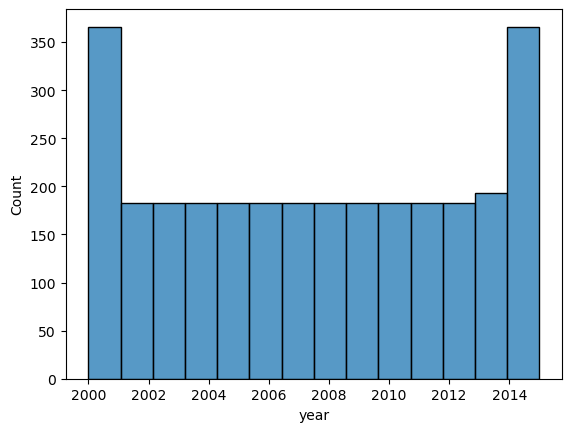

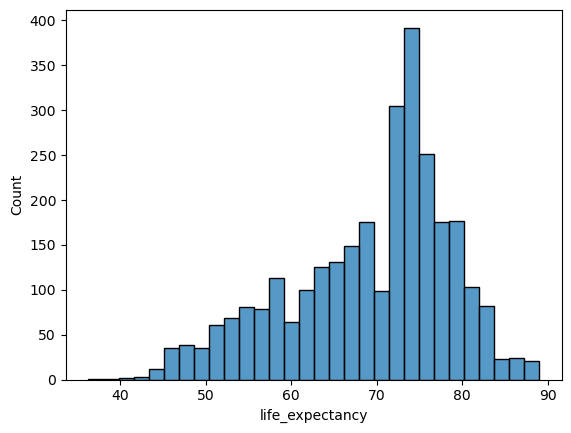

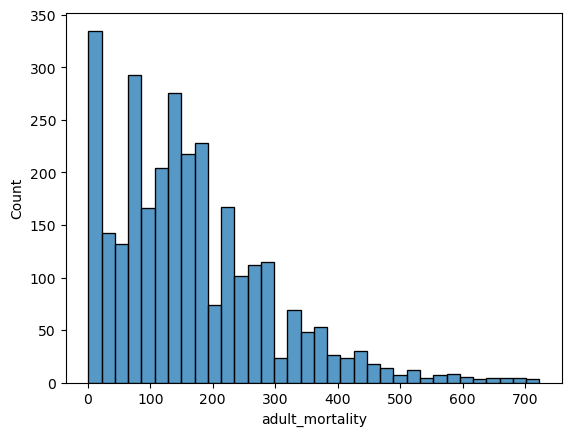

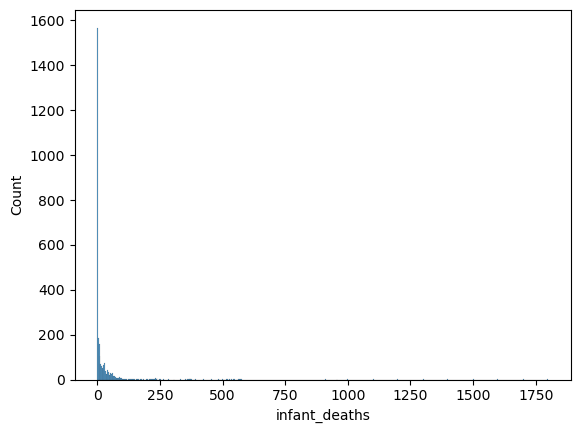

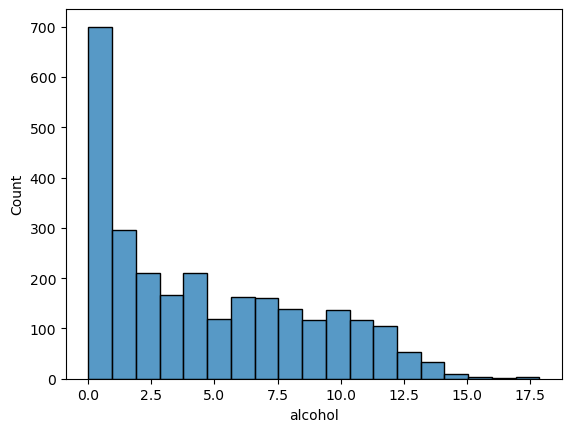

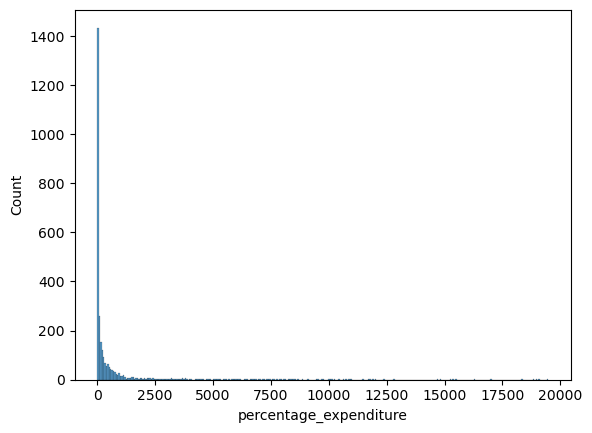

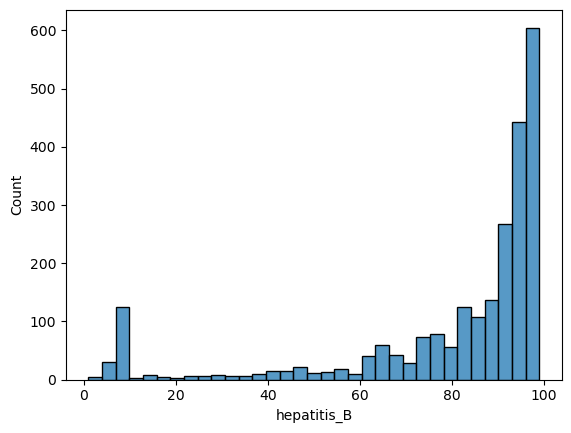

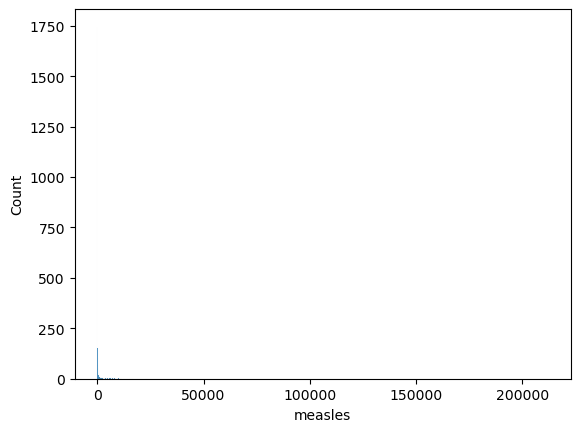

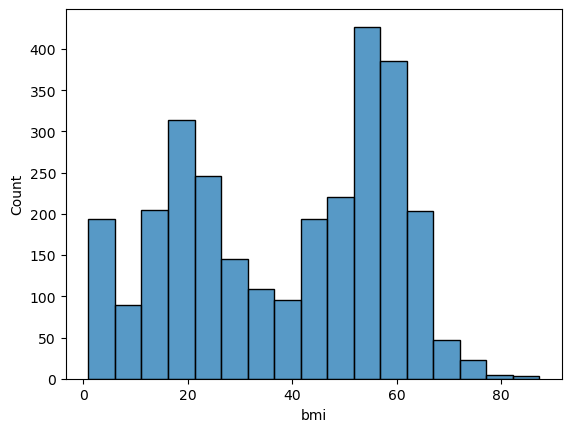

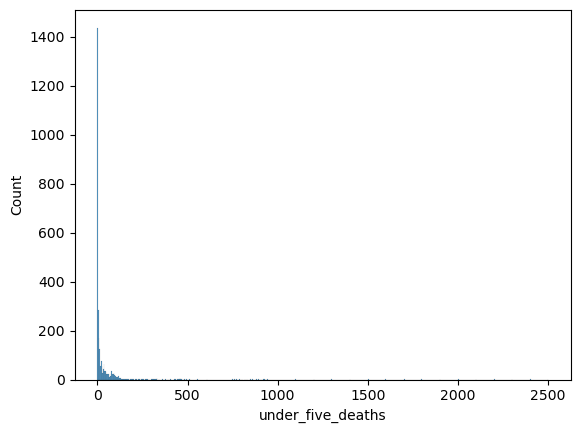

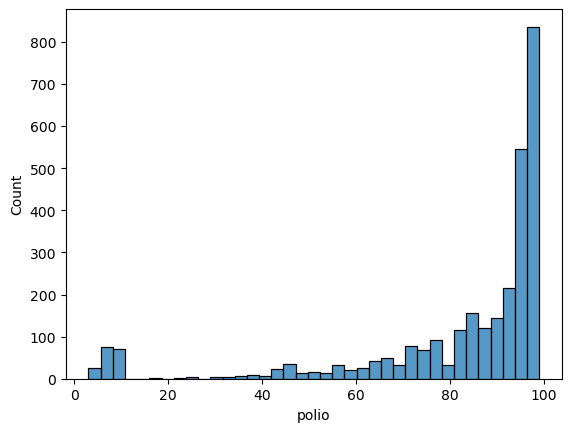

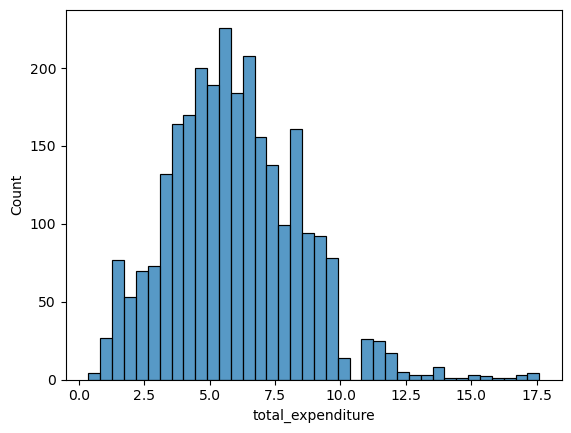

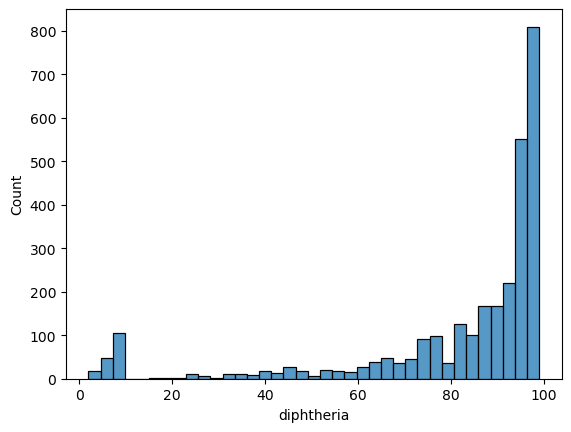

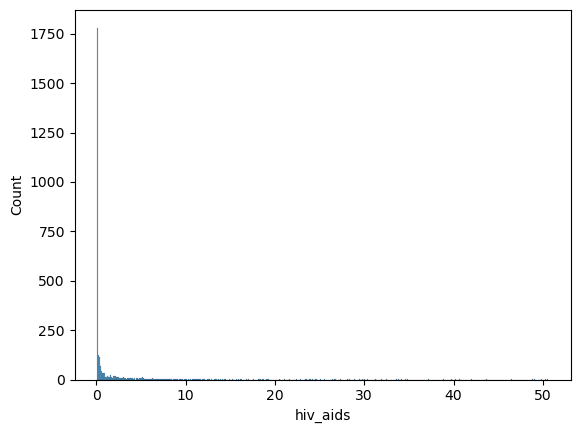

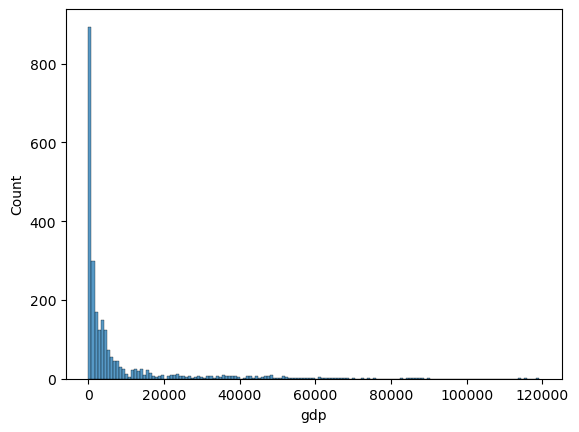

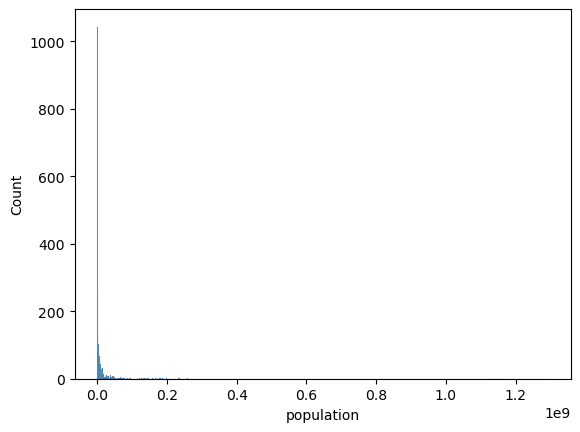

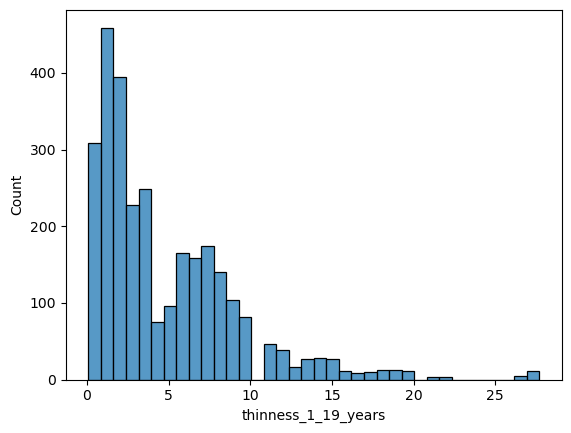

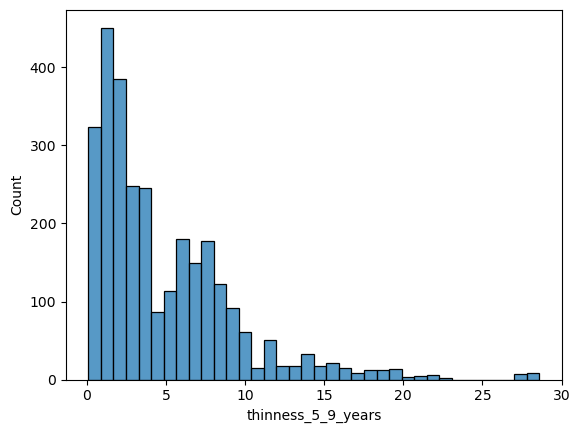

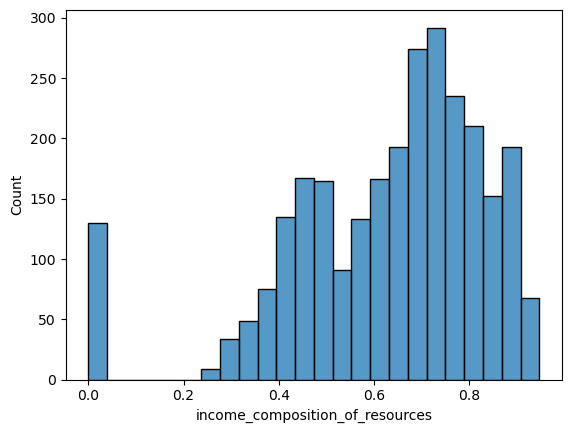

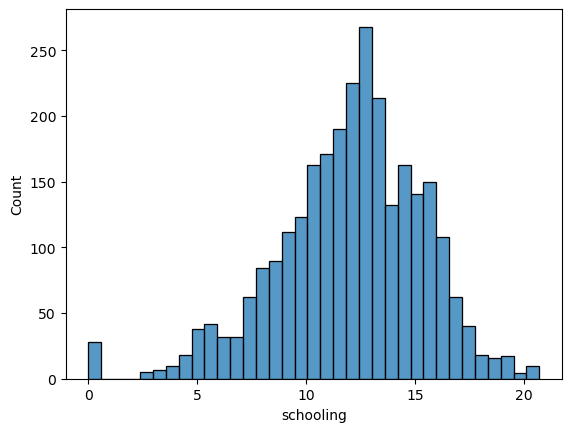

In [15]:
#Histogram to understand the distribution for columns of numeric types
for i in df.select_dtypes(include="number").columns:
    sns.histplot(data=df, x=i)
    plt.show()

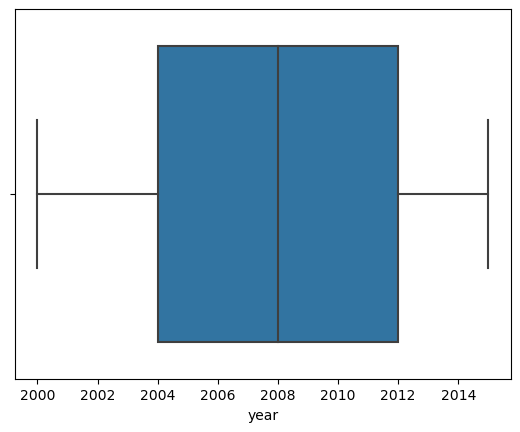

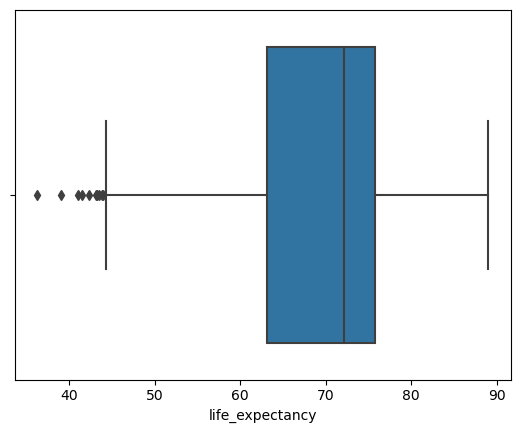

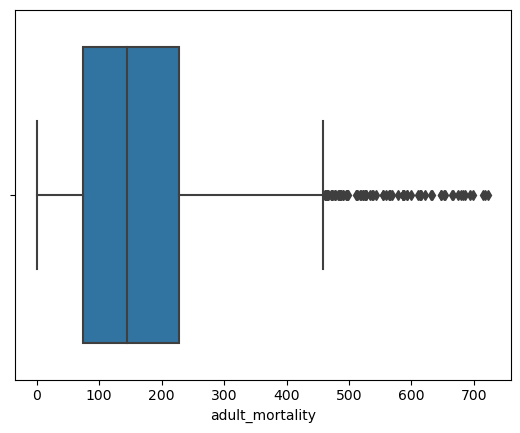

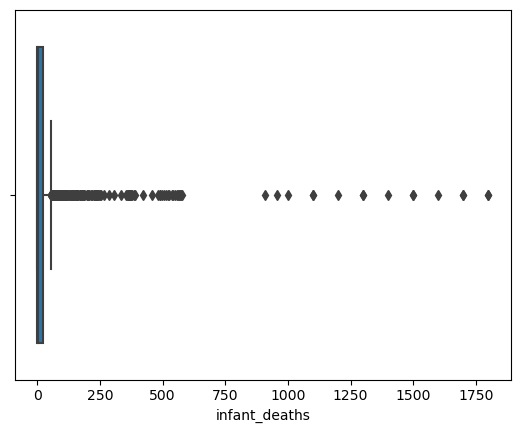

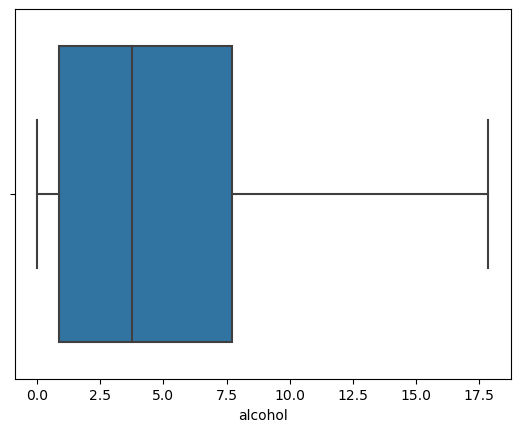

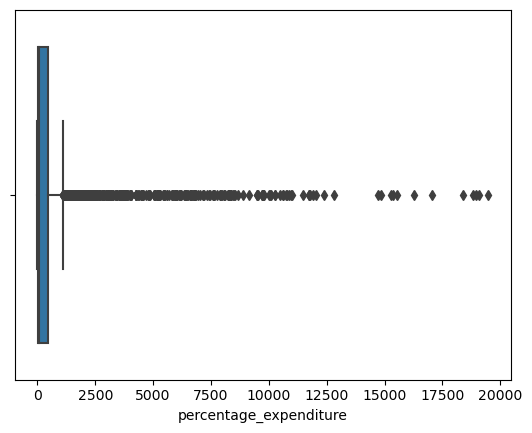

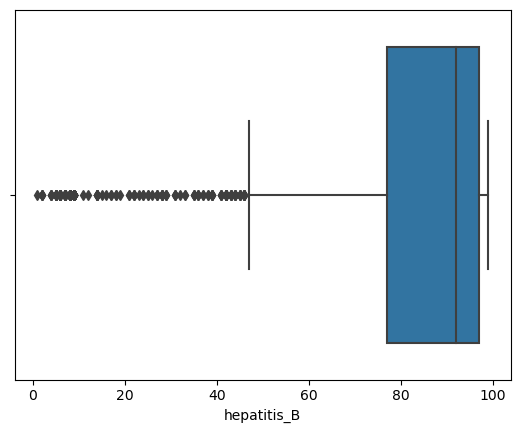

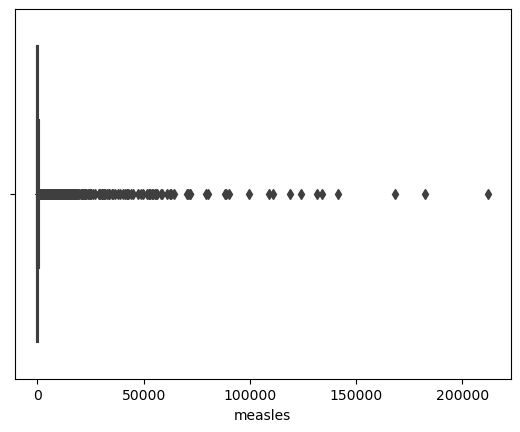

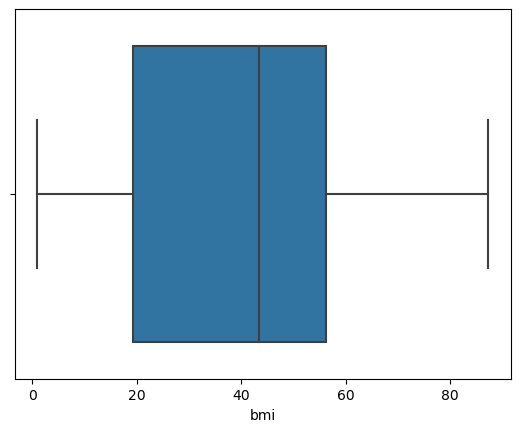

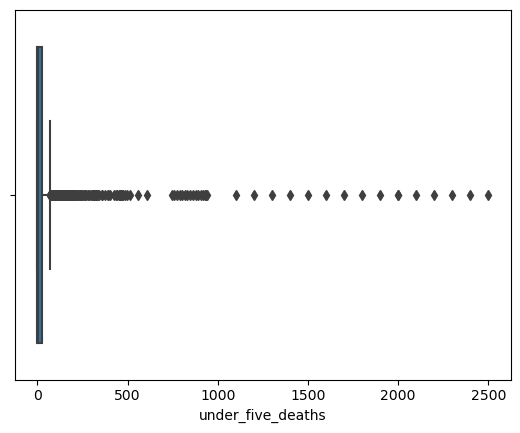

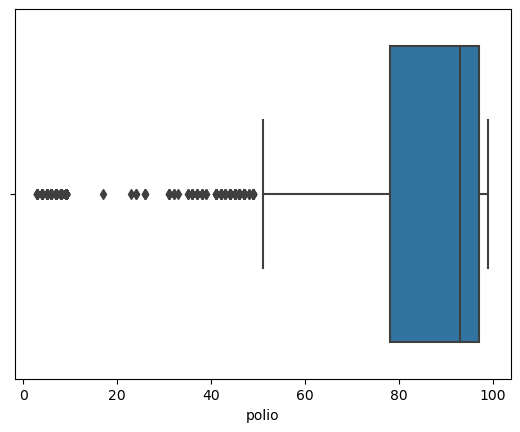

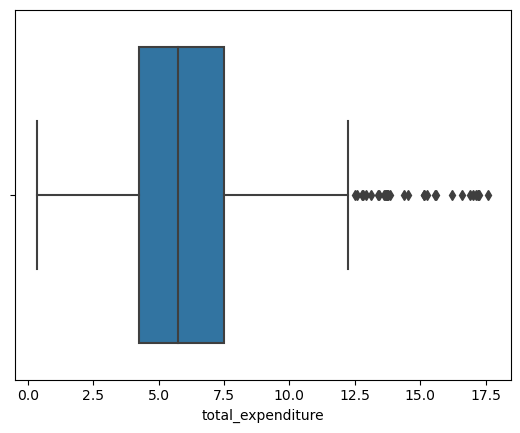

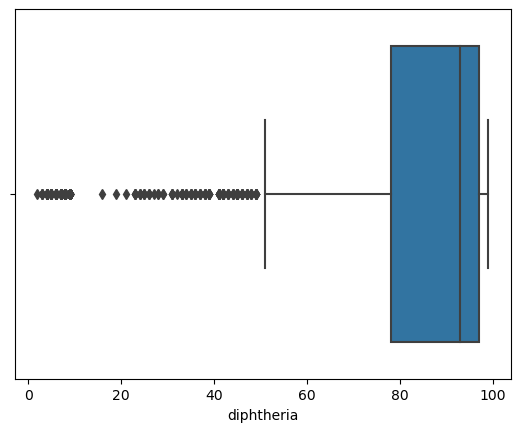

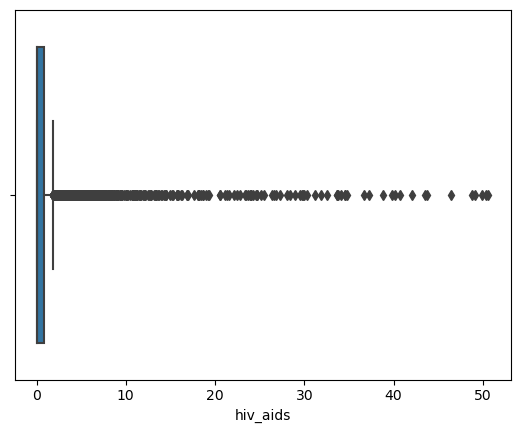

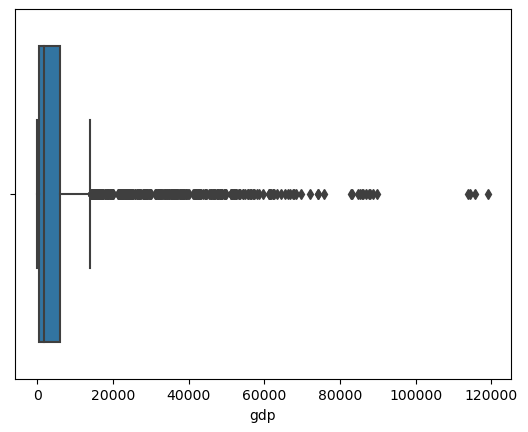

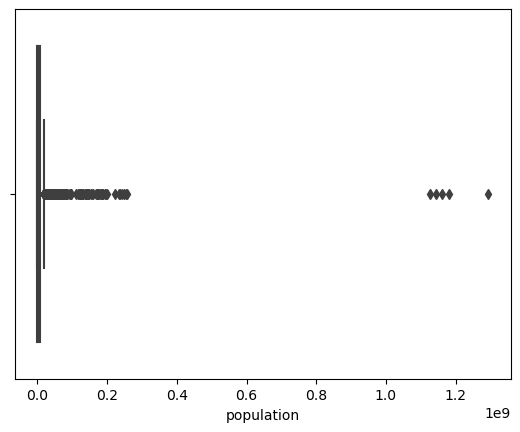

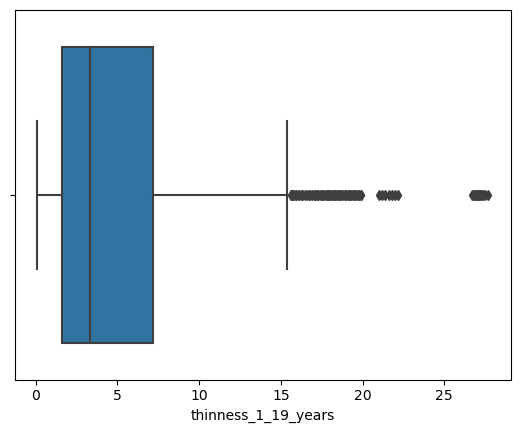

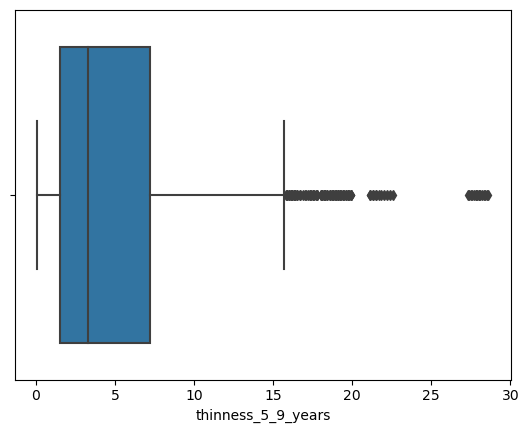

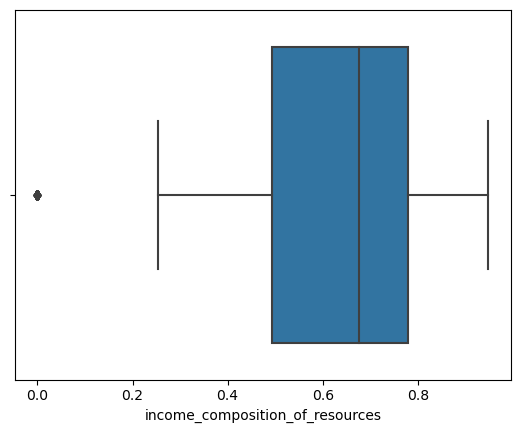

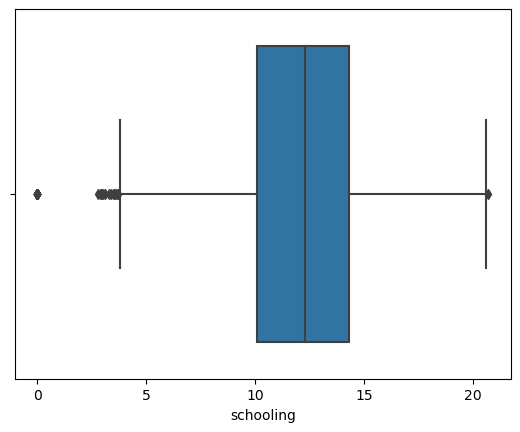

In [16]:
#Boxplot to identify outliers
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df, x=i)
    plt.show()

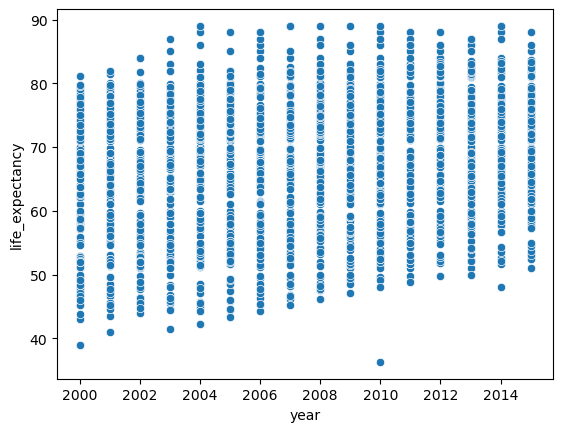

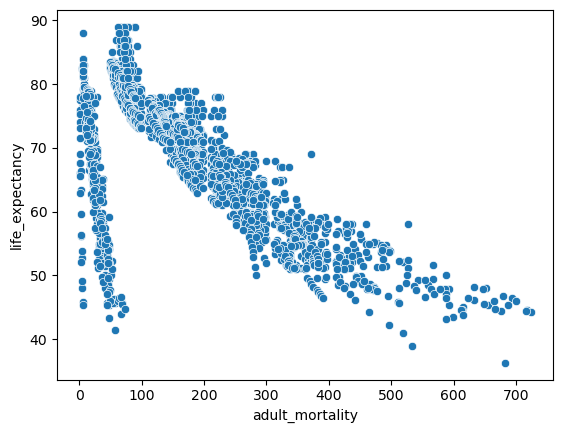

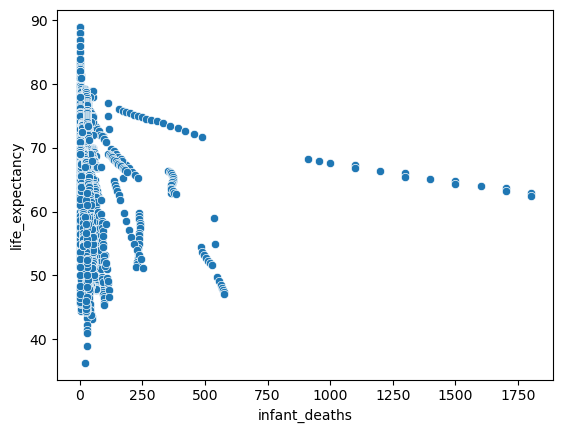

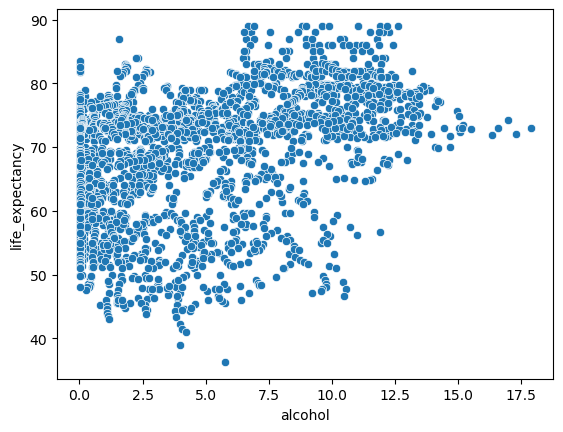

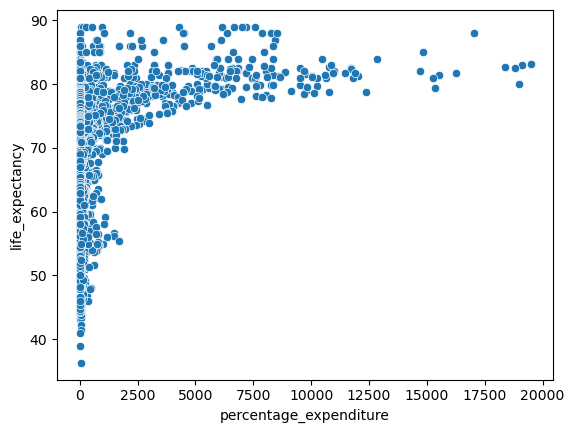

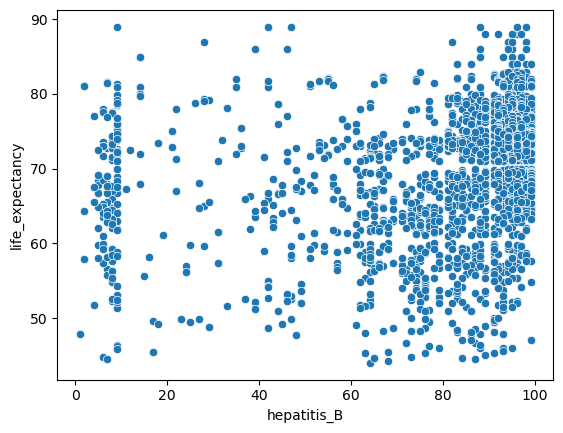

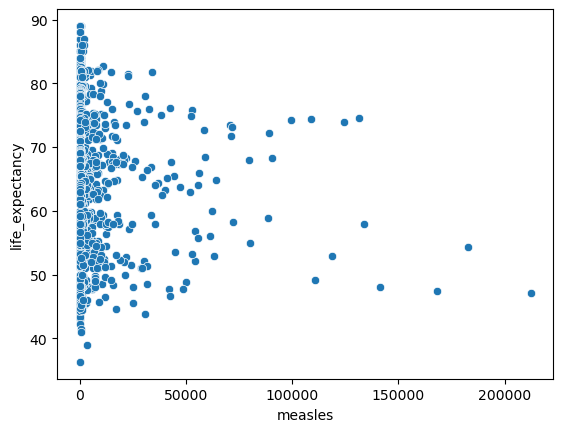

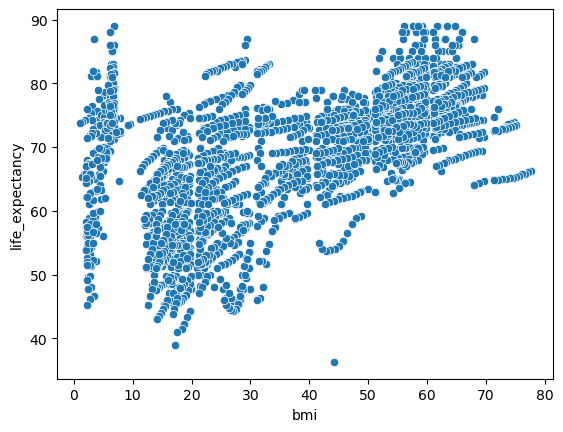

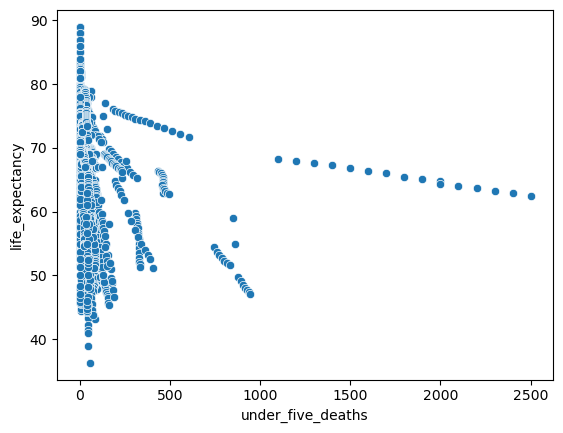

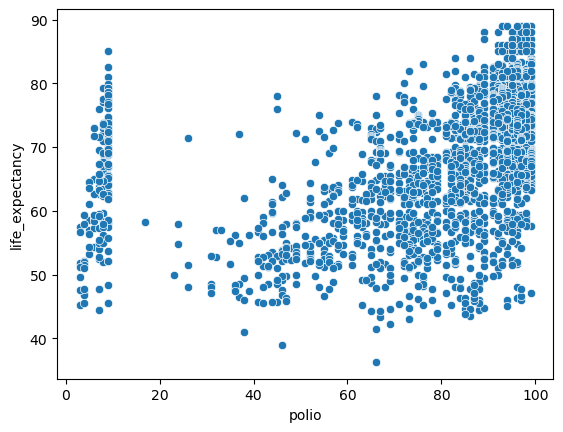

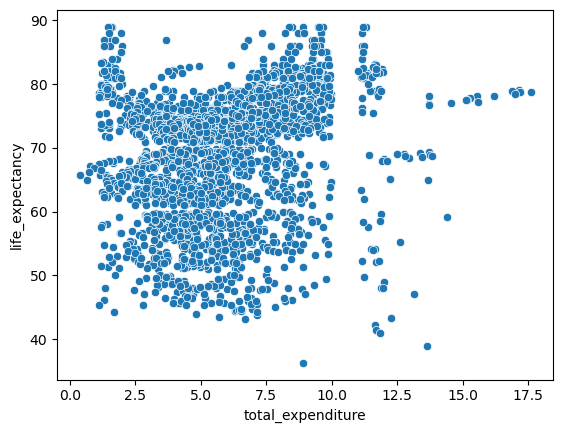

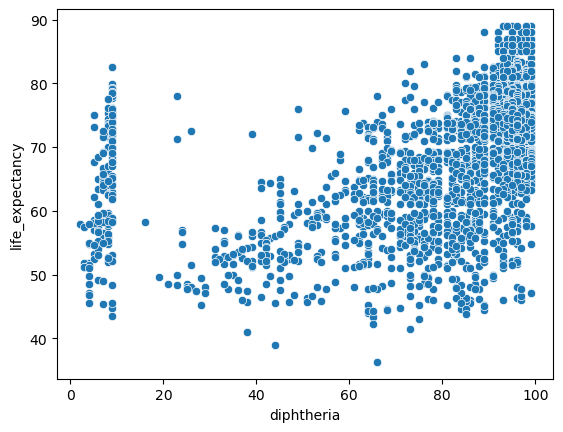

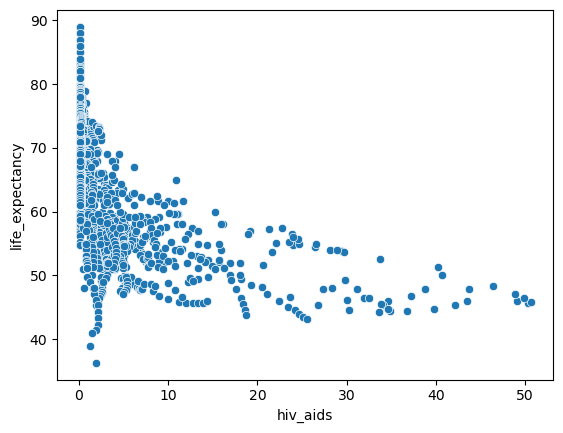

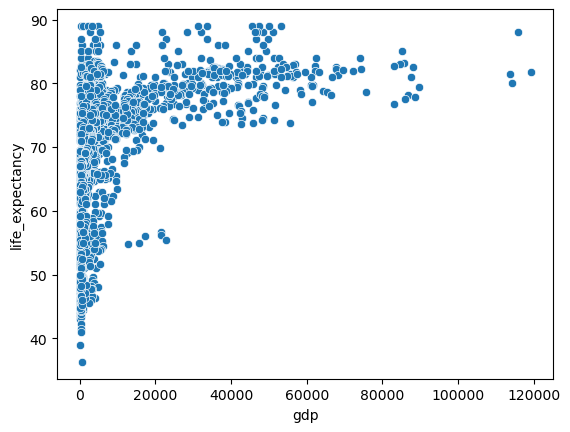

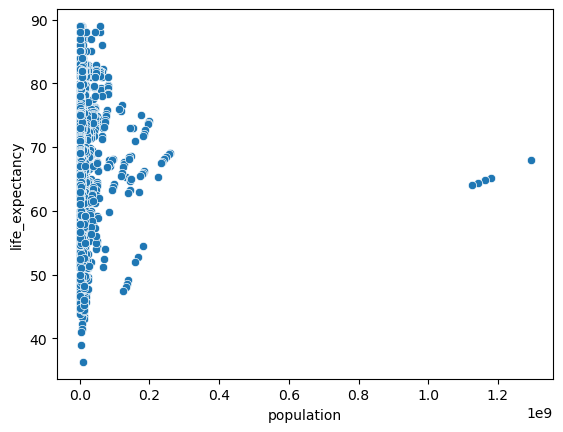

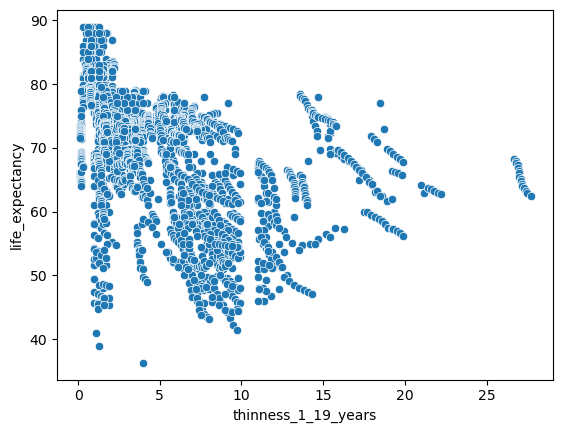

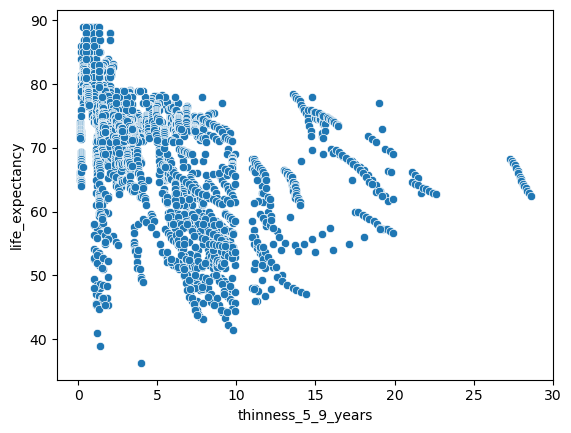

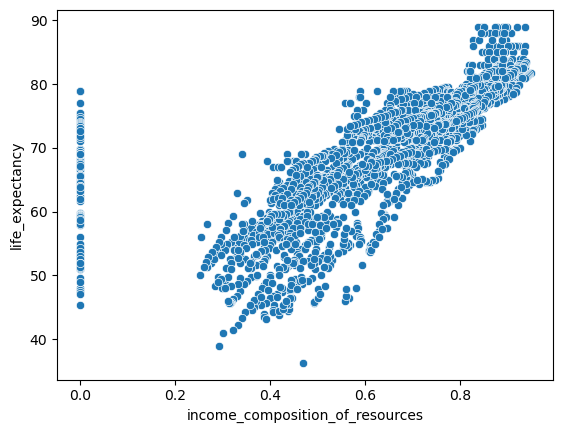

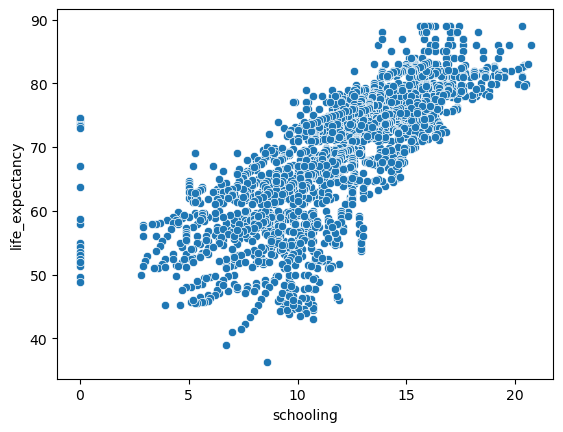

In [17]:
#Scatter plots to understand the relationships of life expectancy with other columns
for i in ['year', 'adult_mortality', 'infant_deaths',
       'alcohol', 'percentage_expenditure', 'hepatitis_B', 'measles', 'bmi',
       'under_five_deaths', 'polio', 'total_expenditure', 'diphtheria',
       'hiv_aids', 'gdp', 'population', 'thinness_1_19_years',
       'thinness_5_9_years', 'income_composition_of_resources', 'schooling']:    
    sns.scatterplot(data=df, x=i, y='life_expectancy')
    plt.show()      

In [18]:
#Correlation with heatmap to interpret the relation and multi collininiarity
df.select_dtypes(include="number").corr()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_B,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
year,1.000000,0.170033,-0.079052,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,-0.042937,0.094158,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400
life_expectancy,0.170033,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,-0.222529,0.465556,0.218086,0.479495,-0.556556,0.461455,-0.021538,-0.477183,-0.471584,0.724776,0.751975
adult_mortality,-0.079052,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,0.094146,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.457626,-0.454612
infant_deaths,-0.037415,-0.196557,0.078756,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720
alcohol,-0.052990,0.404877,-0.195848,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378
percentage_expenditure,0.031400,0.381864,-0.242860,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687
hepatitis_B,0.104333,0.256762,-0.162476,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117
measles,-0.082493,-0.157586,0.031176,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225
bmi,0.108974,0.567694,-0.387017,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961
under_five_deaths,-0.042937,-0.222529,0.094146,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.112081,0.544423,0.467789,0.472263,-0.163305,-0.209373


<Axes: >

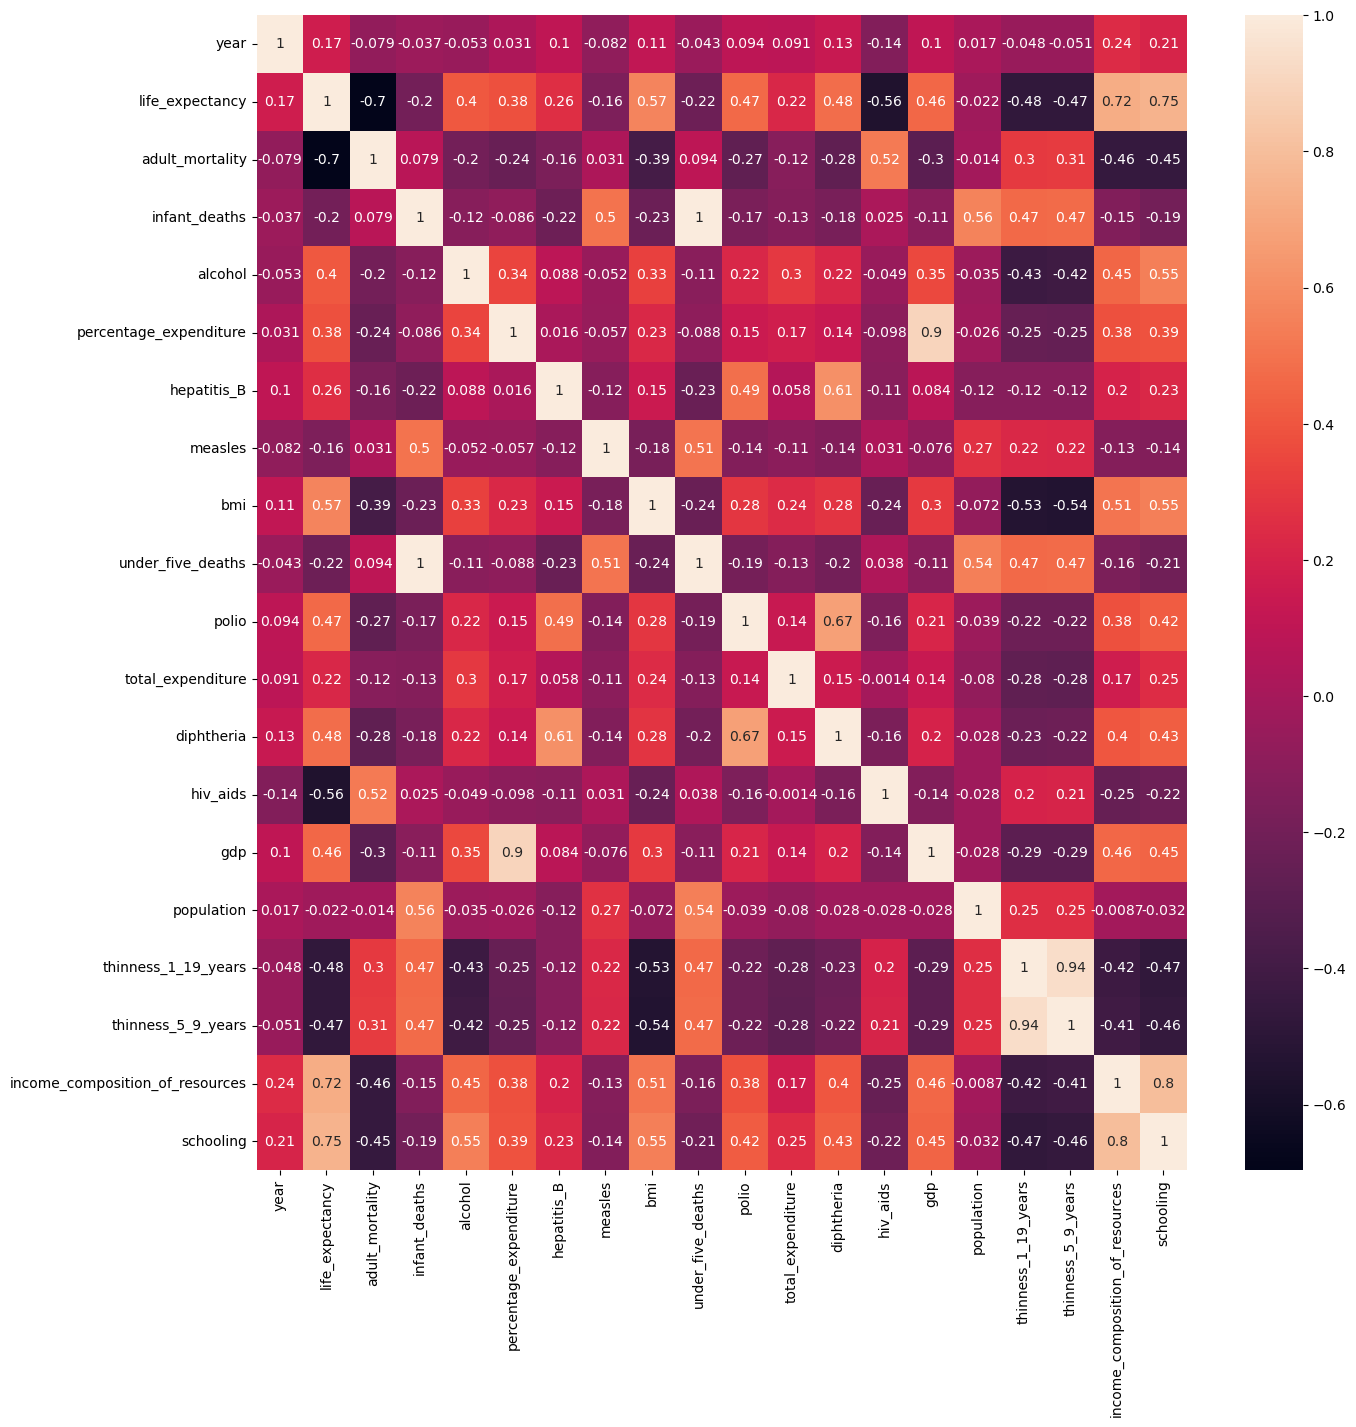

In [19]:
#Using annot to get the values and increase the size
plt.figure(figsize=(15,15))
sns.heatmap(df.select_dtypes(include="number").corr(), annot=True)

#### 5. Missing values treatment

In [20]:
#Choose the method of imputing missing values: median, mean, mode or KNNImputer
#For numerical columns, we will use the median method.

for i in ['bmi', 'polio','income_composition_of_resources']:
    df[i].fillna(df[i].median(), inplace=True)

#For categorical columns, we will use the mode method but there are no categorical columns with missing value in this dataset.


In [21]:
# Example of using KNNImputer
#from sklearn.impute import KNNImputer
#impute=KNNImputer()
#for i in df.select_dtypes(include="number").columns:
#    df[i] = impute.fit_transform(df[[i]])
#df.isnull().sum()

#### 6. Outliers treatment
Decide whether to do outliers treatment or no. If doing, how?
Outliers treatments are done for continuous numerical date. Not for categorical data, discrete variables and target variable.

In [22]:
#q1 is 25%
#q3 is 75%
#Function not working**********************************
def wisker(col):
    q1,q3=np.percentile(col,[25,75])
#    q1 = np.percentile(col,25)
#    print(q1)
    iqr=q3-q1
    lw=q1-1.5*iqr     #lower wisker
    uw=q3+1.5*iqr     #upper wisker
    return lw,uw


In [23]:
wisker(df['gdp'])
#wisker(df['Total expenditure'])
#wisker(df[' thinness  1-19 years'])

(nan, nan)

In [24]:
#Filling the abd lower and upper wisker of three columns
for i in ['gdp', 'total_expenditure', 'thinness_1_19_years', 'thinness_5_9_years']:
    lw,uw=wisker(df[i])
    df[i]=np.where(df[i]<lw, lw, df[i])
    df[i]=np.where(df[i]>uw, uw, df[i])

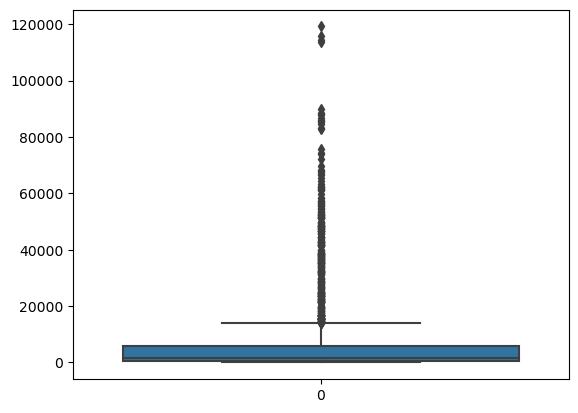

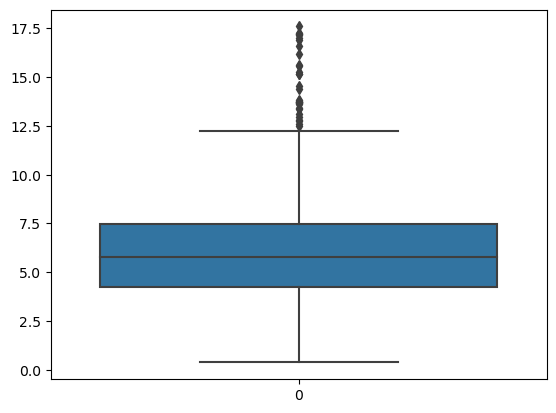

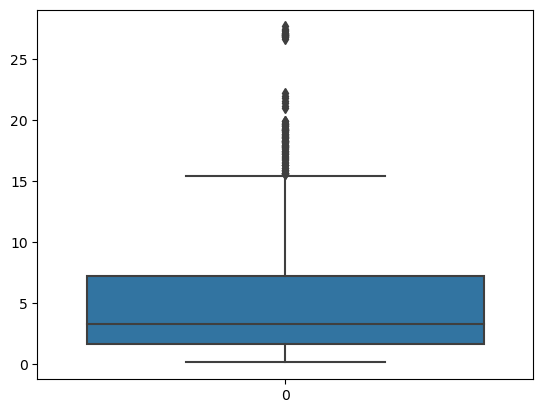

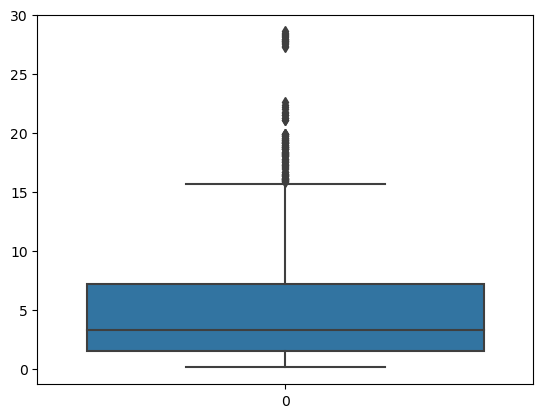

In [25]:
#Boxplot to identify outliers for the 3 columns
for i in ['gdp', 'total_expenditure', 'thinness_1_19_years', 'thinness_5_9_years']:
    sns.boxplot(df[i])
    plt.show()

#### 7. Duplicates and garbage values treatment

In [26]:
# There are no duplicate nor garbage values
# We use drop_duplicates() to drop duplicate values. If there were duplicate value, we would have to choose between mean or median for treatment.

#### 8. Encoding of categorical Values
Encoding is converting categorical values into compatible numerical representations.
There are two types of encoding: label encoding and dummies encoding.

In [27]:
dummy=pd.get_dummies(data=df, columns=['country', 'status'], drop_first=True)

In [28]:
dummy

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_B,measles,bmi,under_five_deaths,...,country_United States of America,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela (Bolivarian Republic of),country_Viet Nam,country_Yemen,country_Zambia,country_Zimbabwe,status_Developing
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,False,False,False,False,False,False,False,False,False,True
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,False,False,False,False,False,False,False,False,False,True
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,False,False,False,False,False,False,False,False,False,True
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,False,False,False,False,False,False,False,False,False,True
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,...,False,False,False,False,False,False,False,False,True,True
2934,2003,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,...,False,False,False,False,False,False,False,False,True,True
2935,2002,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,...,False,False,False,False,False,False,False,False,True,True
2936,2001,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,...,False,False,False,False,False,False,False,False,True,True


#### 9. Adding a column for continent and assigning each country to its continent.

In [29]:
#Add a new column after the country column
df.insert(1, 'continent', '')

africa = ["Algeria", "Angola", "Benin", "Botswana", "Burkina Faso", "Burundi", "Cabo Verde", "Cameroon", "Central African Republic", "Chad", "Comoros", "Congo", "Democratic Republic of the Congo", "Djibouti", "Egypt", "Equatorial Guinea", "Eritrea", "Eswatini", "Ethiopia", "Gabon", "Gambia", "Ghana", "Guinea", "Guinea-Bissau", "Côte d'Ivoire", "Kenya", "Lesotho", "Liberia", "Libya", "Madagascar", "Malawi", "Mali", "Mauritania", "Mauritius", "Morocco", "Mozambique", "Namibia", "Niger", "Nigeria", "Rwanda", "Sao Tome and Principe", "Senegal", "Seychelles", "Sierra Leone", "Somalia", "South Africa", "South Sudan", "Swaziland", "Sudan", "United Republic of Tanzania", "Togo", "Tunisia", "Uganda", "Zambia", "Zimbabwe"]
asia = ["Afghanistan", "Bahrain", "Bangladesh", "Bhutan", "Brunei Darussalam", "Cambodia", "China", "Georgia", "Hong Kong", "India", "Indonesia", "Iran (Islamic Republic of)", "Iraq", "Israel", "Japan", "Jordan", "Kazakhstan", "Kuwait", "Kyrgyzstan", "Lao People's Democratic Republic", "Lebanon", "Macau", "Malaysia", "Maldives", "Mongolia", "Myanmar", "Nepal", "Democratic People's Republic of Korea", "Oman", "Pakistan", "Palestine", "Philippines", "Qatar", "Saudi Arabia", "Singapore", "Republic of Korea", "Sri Lanka", "Syrian Arab Republic", "Taiwan", "Tajikistan", "Thailand", "Timor-Leste", "Turkey", "Turkmenistan", "United Arab Emirates", "Uzbekistan", "Viet Nam", "Yemen"]
europe = ["Albania", "Andorra", "Armenia", "Austria", "Azerbaijan", "Belarus", "Belgium", "Bosnia and Herzegovina", "Bulgaria", "Croatia", "Cyprus", "Czechia", "Denmark", "Estonia", "Finland", "France", "Georgia", "Germany", "Greece", "Hungary", "Iceland", "Ireland", "Italy", "Latvia", "Liechtenstein", "Lithuania", "Luxembourg", "Malta", "Republic of Moldova", "Monaco", "Montenegro", "Netherlands", "The former Yugoslav republic of Macedonia", "Norway", "Poland", "Portugal", "Romania", "Russian Federation", "San Marino", "Serbia", "Slovakia", "Slovenia", "Spain", "Sweden", "Switzerland", "Ukraine", "United Kingdom of Great Britain and Northern Ireland", "Vatican"]
north_america = ["Antigua and Barbuda", "Bahamas", "Barbados", "Belize", "Canada", "Costa Rica", "Cuba", "Dominica", "Dominican Republic", "El Salvador", "Grenada", "Guatemala", "Haiti", "Honduras", "Jamaica", "Mexico", "Nicaragua", "Panama", "Saint Kitts and Nevis", "Saint Lucia", "Saint Vincent and the Grenadines", "Trinidad and Tobago", "United States of America"]
south_america = ["Argentina", "Bolivia (Plurinational State of)", "Brazil", "Chile", "Colombia", "Ecuador", "Guyana", "Paraguay", "Peru", "Suriname", "Uruguay", "Venezuela (Bolivarian Republic of)"]
oceania = ["Australia", "Cook Islands", "Fiji", "Kiribati", "Marshall Islands", "Micronesia (Federated States of)", "Nauru", "Niue", "New Zealand", "Palau", "Papua New Guinea", "Samoa", "Solomon Islands", "Tonga", "Tuvalu", "Vanuatu"]

def get_continent(country):
    if country in africa:
        return "Africa"
    elif country in asia:
        return "Asia"
    elif country in europe:
        return "Europe"
    elif country in north_america:
        return "North America"
    elif country in south_america:
        return "South America"
    elif country in oceania:
        return "Oceania"
    elif country in ["Côte d'Ivoire", "Cabo Verde", "Congo", "United Republic of Tanzania"]:
        return "Africa"
    elif country in ["Brunei Darussalam", "Iran (Islamic Republic of)", "Lao People's Democratic Republic", "Democratic People's Republic of Korea", "Republic of Korea", "Syrian Arab Republic", "Timor-Leste", "Viet Nam"]:
        return "Asia"
    elif country in ["Czechia", "Republic of Moldova", "Russian Federation", "The former Yugoslav republic of Macedonia", "United Kingdom of Great Britain and Northern Ireland"]:
        return "Europe"
    elif country in ["Bolivia (Plurinational State of)", "Venezuela (Bolivarian Republic of)"]:
        return "South America"
    elif country in ["Cook Islands", "Micronesia (Federated States of)", "Niue"]:
        return "Oceania"
    else:
        return "Other"

df['continent'] = df['country'].apply(lambda x: get_continent(x))

#Checking countries which with no continent assigned.
print(df.loc[df['continent'] == 'Other', 'country'].unique())

[]


In [30]:
#Saving the cleaned data under a new name
df.to_csv(r"C:\Users\Administrator\Documents\Projects\cleaned.csv", index=False, encoding='utf-8')